In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
df = pd.read_csv("../processed-datasets/data_outliers_handled_knn_imputed.csv")

In [3]:
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)

In [4]:
df.head()

,age_ma,Feature,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,0.0,7.88,0.050,10.500,0.050,4.25000,11.60000,1.99000,61.600,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2737.00000,12390.0,305.0,134.0
1,222.0,0.0,10.90,1.555,61.505,0.725,7.74125,12.56125,2.64375,63.555,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12591.0,503.0,272.0
2,222.0,0.0,6.00,0.020,25.100,0.300,4.41000,12.56125,2.30000,63.555,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12724.0,639.0,414.0
3,222.0,0.0,9.06,0.280,12.000,0.070,1.88000,5.08000,1.01000,33.800,...,194.00000,83.0000,356.00000,89.5000,762.000,144.00000,1832.00000,12894.0,308.0,127.0
4,222.0,0.0,4.93,0.070,16.500,0.150,2.32000,8.23000,1.52000,45.600,...,257.00000,106.1375,437.54375,97.8675,936.000,171.00000,2355.00000,12535.0,348.0,155.0


In [5]:
X = df.drop(columns = ['Feature'], axis=1)
y = df.Feature

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
rf.feature_importances_

array([0.17968452, 0.03601088, 0.02732641, 0.04217627, 0.05770951,
       0.09333172, 0.07220728, 0.07182686, 0.02091584, 0.02984033,
       0.06381946, 0.01803936, 0.01857586, 0.01733879, 0.02202623,
       0.02937206, 0.01564125, 0.06906014, 0.06332417, 0.05177308])

Text(0.5, 1.0, 'Feature Importance - Random Forest')

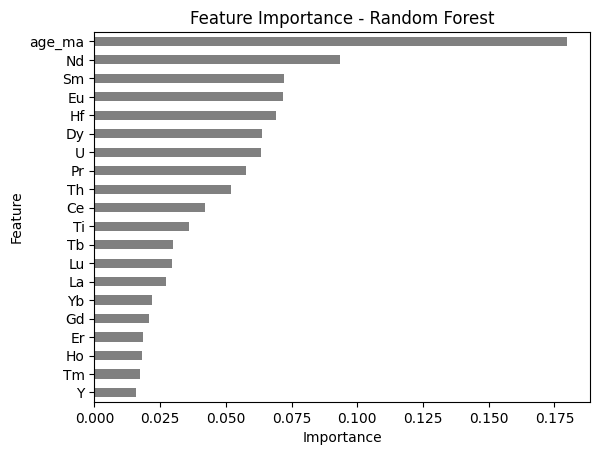

In [9]:
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='grey')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")

In [11]:
global_importances.sort_values(ascending=False)

age_ma    0.179685
Nd        0.093332
Sm        0.072207
Eu        0.071827
Hf        0.069060
Dy        0.063819
U         0.063324
Pr        0.057710
Th        0.051773
Ce        0.042176
Ti        0.036011
Tb        0.029840
Lu        0.029372
La        0.027326
Yb        0.022026
Gd        0.020916
Er        0.018576
Ho        0.018039
Tm        0.017339
Y         0.015641
dtype: float64

In [10]:
rf.estimators_[0].feature_importances_

array([0.2420064 , 0.03489497, 0.07023126, 0.02573852, 0.0302316 ,
       0.02971244, 0.04356971, 0.05412296, 0.01261222, 0.00330723,
       0.23974317, 0.00319999, 0.02581396, 0.02042253, 0.01531374,
       0.02825823, 0.01952711, 0.03406183, 0.04490773, 0.02232439])

In [11]:
global_importances.sort_values(ascending=False)

age_ma    0.187468
Nd        0.081075
Sm        0.076586
U         0.076472
Eu        0.072796
Hf        0.070224
Dy        0.061621
Pr        0.060709
Th        0.046368
Ce        0.040714
Lu        0.033922
La        0.031364
Ti        0.029102
Tb        0.026808
Yb        0.020911
Tm        0.019393
Gd        0.019110
Ho        0.017352
Y         0.015390
Er        0.012614
dtype: float64

In [12]:
selected_features = global_importances.sort_values(ascending=False).index[:10]

In [13]:
df_selected = df[selected_features]

In [14]:
df_selected

,age_ma,Nd,Sm,U,Eu,Hf,Dy,Pr,Th,Ce
0,222.00,4.25000,11.60000,305.0,1.99000,12390.0,259.21625,0.050,134.0,10.500
1,222.00,7.74125,12.56125,503.0,2.64375,12591.0,259.21625,0.725,272.0,61.505
2,222.00,4.41000,12.56125,639.0,2.30000,12724.0,259.21625,0.300,414.0,25.100
3,222.00,1.88000,5.08000,308.0,1.01000,12894.0,194.00000,0.070,127.0,12.000
4,222.00,2.32000,8.23000,348.0,1.52000,12535.0,257.00000,0.150,155.0,16.500
...,...,...,...,...,...,...,...,...,...,...
2983,150.31,0.83000,1.75000,92.0,0.27000,8803.0,40.90000,0.050,66.0,8.000
2984,55.92,2.00000,3.76000,100.0,0.52000,8854.0,69.50000,0.140,90.0,9.000
2985,76.25,2.82000,4.31000,97.0,0.53000,8890.0,69.20000,0.170,86.0,9.000
2986,127.39,0.70000,1.56000,82.0,0.23000,9032.0,34.20000,0.040,55.0,8.000


In [15]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(df_selected, y, test_size=0.2, shuffle=True)

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train_sel, y_train_sel)

RandomForestClassifier()

In [17]:
y_pred_sel = rf.predict(X_test_sel)

In [18]:
accuracy_score(y_test_sel, y_pred_sel)

0.9531772575250836

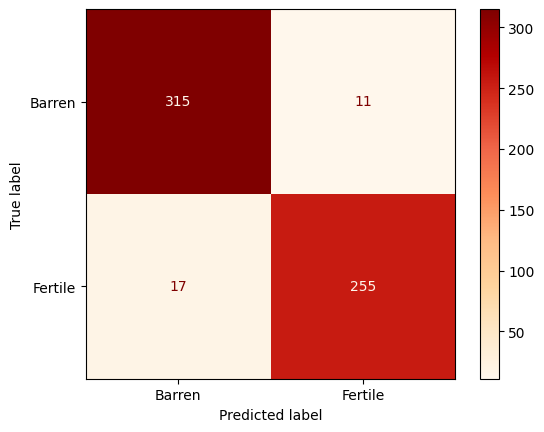

In [19]:
cm = confusion_matrix(y_test_sel, y_pred_sel)

ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot(cmap = 'OrRd')